In [804]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

In [805]:
df = pd.read_csv(r"C:\Users\SURFACE\Downloads\Housing_dataset_train.csv")

In [806]:
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [808]:
df.shape

(14000, 7)

In [809]:
df.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [810]:
df['loc'].fillna(df['loc'].mode()[0], inplace=True)
df['title'].fillna(df['title'].mode()[0], inplace=True)

In [811]:
df.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [812]:
df.bedroom.describe()

count    12201.000000
mean         4.308171
std          2.441165
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          9.000000
Name: bedroom, dtype: float64

In [813]:
df["bedroom"]=df["bedroom"].fillna("Missing")
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,Missing,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,Missing,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,Missing,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,Missing,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,Missing,6.0,1.0,3348918.718


In [814]:
df["bedroom"].replace("Missing",0)

0        2.0
1        0.0
2        7.0
3        5.0
4        0.0
        ... 
13995    0.0
13996    0.0
13997    8.0
13998    0.0
13999    9.0
Name: bedroom, Length: 14000, dtype: float64

In [815]:
df["bedroom"]=df["bedroom"].replace("Missing",0)
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,0.0,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,0.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,0.0,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,0.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,0.0,6.0,1.0,3348918.718


In [816]:
(df["bedroom"].mean())

3.7545714285714284

In [817]:
df["bedroom"]=df["bedroom"].replace(0,4)
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,4.0,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,4.0,6.0,1.0,3348918.718


In [818]:
df.bathroom.describe()

count    12195.000000
mean         3.134235
std          2.035950
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max          7.000000
Name: bathroom, dtype: float64

In [819]:
df["bathroom"]=df["bathroom"].fillna("Missing")
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,4.0,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,4.0,6.0,1.0,3348918.718


In [820]:
df["bathroom"].replace("Missing",0)

0        2.0
1        2.0
2        5.0
3        2.0
4        5.0
        ... 
13995    7.0
13996    7.0
13997    6.0
13998    6.0
13999    7.0
Name: bathroom, Length: 14000, dtype: float64

In [821]:
df["bathroom"]=df["bathroom"].replace("Missing",0)
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,4.0,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,4.0,6.0,1.0,3348918.718


In [822]:
(df["bathroom"].mean())

2.730142857142857

In [823]:
df["bathroom"]=df["bathroom"].replace(0,3)
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,4.0,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,4.0,6.0,1.0,3348918.718


In [824]:
df.parking_space.describe()

count    12189.000000
mean         3.169825
std          1.599415
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: parking_space, dtype: float64

In [825]:
df["parking_space"]=df["parking_space"].fillna("Missing")
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,Missing,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,4.0,7.0,Missing,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,4.0,6.0,1.0,3348918.718


In [826]:
df["parking_space"].replace("Missing",0)

0        1.0
1        4.0
2        0.0
3        4.0
4        6.0
        ... 
13995    0.0
13996    5.0
13997    5.0
13998    1.0
13999    5.0
Name: parking_space, Length: 14000, dtype: float64

In [827]:
df["parking_space"]=df["parking_space"].replace("Missing",0)
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,0.0,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,4.0,7.0,0.0,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,4.0,6.0,1.0,3348918.718


In [828]:
(df["parking_space"].mean())

2.759785714285714

In [829]:
df["parking_space"]=df["parking_space"].replace(0,3)
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,3.0,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,4.0,7.0,3.0,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,4.0,6.0,1.0,3348918.718


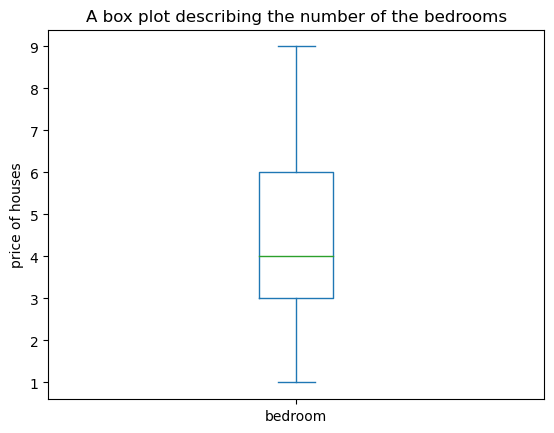

In [830]:
df["bedroom"].plot(kind="box")
plt.title("A box plot describing the number of the bedrooms")
plt.ylabel("price of houses")
plt.show()

In [831]:
df.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [832]:
from sklearn.preprocessing import LabelEncoder
df['loc']=LabelEncoder().fit_transform(df['loc'])
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,19,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,27,Apartment,4.0,2.0,4.0,1672416.689
2,9261,12,Flat,7.0,5.0,3.0,3364799.814
3,2224,3,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,21,Terrace duplex,4.0,5.0,6.0,2600700.898


In [833]:
df['title']=LabelEncoder().fit_transform(df['title'])
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,19,7,2.0,2.0,1.0,1149999.565
1,2748,27,0,4.0,2.0,4.0,1672416.689
2,9261,12,4,7.0,5.0,3.0,3364799.814
3,2224,3,3,5.0,2.0,4.0,2410306.756
4,10300,21,8,4.0,5.0,6.0,2600700.898


In [834]:
df.drop('ID', axis=1, inplace=True)

In [835]:
df.head()

,loc,title,bedroom,bathroom,parking_space,price
0,19,7,2.0,2.0,1.0,1149999.565
1,27,0,4.0,2.0,4.0,1672416.689
2,12,4,7.0,5.0,3.0,3364799.814
3,3,3,5.0,2.0,4.0,2410306.756
4,21,8,4.0,5.0,6.0,2600700.898


In [836]:
X = df[['loc', 'title', 'bedroom', 'bathroom','parking_space']]
y = df['price']

In [837]:
#X=df[["loc","title","bathroom","parking_space"]]

In [838]:
#y=df.iloc[:,:-1]

In [839]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)

In [840]:
print("shape of X_train ",(X_train).shape)
print("shape of X_test ",(X_test).shape)
print("shape of y_train ",(y_train).shape)
print("shape of y_test ",(y_test).shape)

shape of X_train  (11200, 5)
shape of X_test  (2800, 5)
shape of y_train  (11200,)
shape of y_test  (2800,)


In [841]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [842]:
y_pred = model.predict(X_test)

In [843]:
mse = mean_squared_error(y_test, y_pred)

In [844]:
r2 = r2_score(y_test, y_pred)
mse, r2

(909025110501.4991, 0.27795896122813846)

In [845]:
rf = RandomForestRegressor()

In [846]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [847]:
y_pred = rf.predict(X_test)

In [848]:
mse = mean_squared_error(y_test, y_pred)

In [849]:
r2 = r2_score(y_test, y_pred)
mse, r2

(409872109040.2566, 0.6744375045791955)

In [850]:
dt = DecisionTreeRegressor()

In [851]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [852]:
y_pred = dt.predict(X_test)

In [853]:
r2 = r2_score(y_test, y_pred)
mse, r2

(409872109040.2566, 0.5225155299735196)

In [854]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [855]:
y_pred = ridge_model.predict(X_test)

In [856]:
r2 = r2_score(y_test, y_pred)
mse, r2

(409872109040.2566, 0.27795828302609105)

In [857]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [858]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [859]:
y_pred = gb_model.predict(X_test)

In [860]:
r2 = r2_score(y_test, y_pred)
mse, r2

(409872109040.2566, 0.6871163834859808)